<a href="https://colab.research.google.com/github/olivier-2018/MNIST/blob/main/MNIST_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd


In [ ]:
fashion_mnist  = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() 


In [2]:
print(X_train_full.shape)
print (y_train_full.shape)

(60000, 28, 28)
(60000,)


Dress


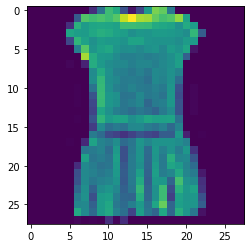

In [3]:
import matplotlib.pyplot as plt
N = 3
plt.imshow(X_train_full[N,:,:])
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names[y_train_full[N]])


In [4]:
X_val, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_val, y_train = y_train_full[:5000] , y_train_full[5000:] 

In [5]:
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [6]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.layers

In [8]:
hidden1 = model.layers[1]
print(hidden1.name)

dense


In [9]:
weights, biases = hidden1.get_weights()
print(weights)
print(biases)


[[-0.06258859 -0.03955444  0.04327669 ... -0.0356578   0.02993107
  -0.00387091]
 [ 0.02955618  0.01217805  0.00885531 ...  0.01107291 -0.05054978
  -0.01935374]
 [ 0.03508697  0.05278008 -0.07358549 ...  0.04046112 -0.0624928
   0.01157798]
 ...
 [ 0.04314903  0.02201528  0.03727124 ...  0.02169843 -0.04012024
  -0.02775433]
 [-0.06138757 -0.05249259  0.06098984 ...  0.00173131  0.01093092
  -0.06824251]
 [-0.0513784  -0.06465662 -0.02279006 ...  0.01123617 -0.03643665
   0.05395675]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7305 - accuracy: 0.7587 - val_loss: 0.5039 - val_accuracy: 0.8334
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4941 - accuracy: 0.8283 - val_loss: 0.4590 - val_accuracy: 0.8416
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4471 - accuracy: 0.8435 - val_loss: 0.4264 - val_accuracy: 0.8560
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4197 - accuracy: 0.8522 - val_loss: 0.3933 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3995 - accuracy: 0.8601 - val_loss: 0.3870 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3831 - accuracy: 0.8660 - val_loss: 0.3827 - val_accuracy: 0.8642
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3688 - accuracy: 0.8702 - val_loss: 0.4038 - val_accuracy:

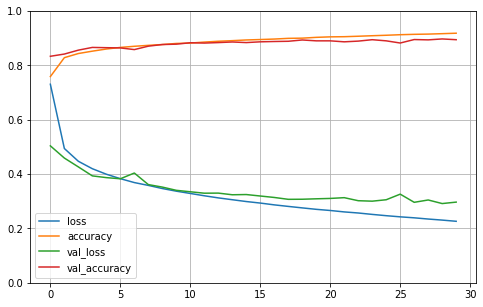

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0, 1]
#save_fig("keras_learning_curves_plot") # optional
plt.show()


In [16]:
model.evaluate(X_train, y_train)

1719/1719 [==============================] - 5s 3ms/step - loss: 0.1876 - accuracy: 0.9340


[0.18759630620479584, 0.934036374092102]

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 79.3109 - accuracy: 0.8333


[79.31092834472656, 0.833299994468689]

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=-1)

print(y_proba.round(2))
print(np.array(class_names)[y_pred])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
['Ankle boot' 'Pullover' 'Trouser']
